In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
%matplotlib inline

In [ ]:
###

In [ ]:
###

In [2]:
data = pd.read_csv('./db/bj_AQI.csv',index_col = 'date',encoding = 'gb18030',parse_dates = True)

In [3]:
## 基本信息
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1837 entries, 2013-12-01 to 2018-12-21
Data columns (total 8 columns):
grade    1837 non-null object
aqi      1837 non-null int64
pm2.5    1837 non-null int64
pm10     1837 non-null int64
so2      1837 non-null int64
no2      1837 non-null int64
co       1837 non-null float64
o3       1837 non-null int64
dtypes: float64(1), int64(6), object(1)
memory usage: 129.2+ KB


In [ ]:
# 基本信息
1. 数据按时间排序，从2013-12-1到2018-4-4共1840列
2. 数据特征包括空气质量，aqi，pm2.5，pm10，so2，no2，co，o3共8列



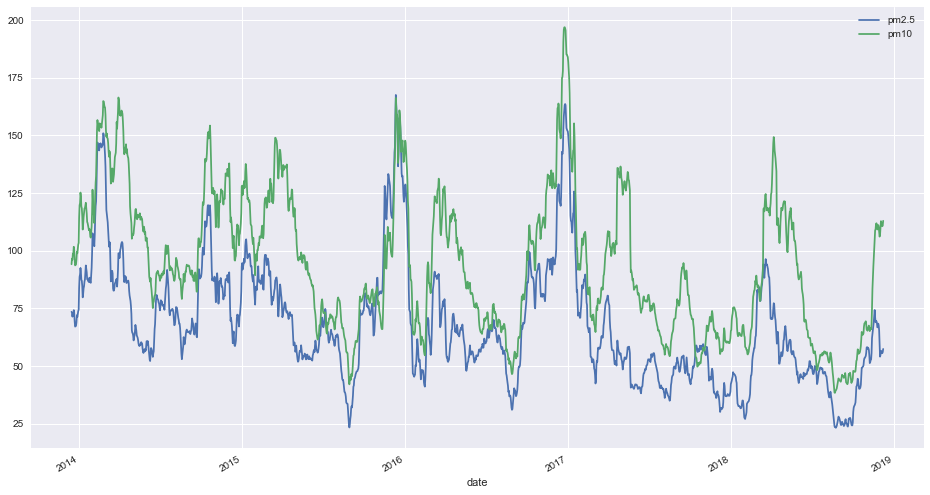

In [32]:
data[['pm2.5','pm10']].rolling(30, center=True).mean().plot(figsize = (16,9))

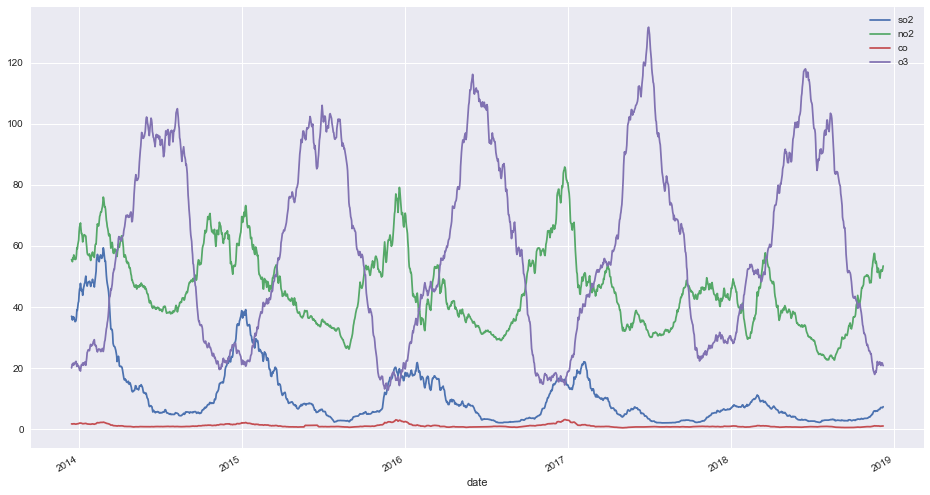

In [33]:
columns = ['so2','no2','co','o3']
data[columns].rolling(30, center=True).mean().plot(figsize = (16,9))

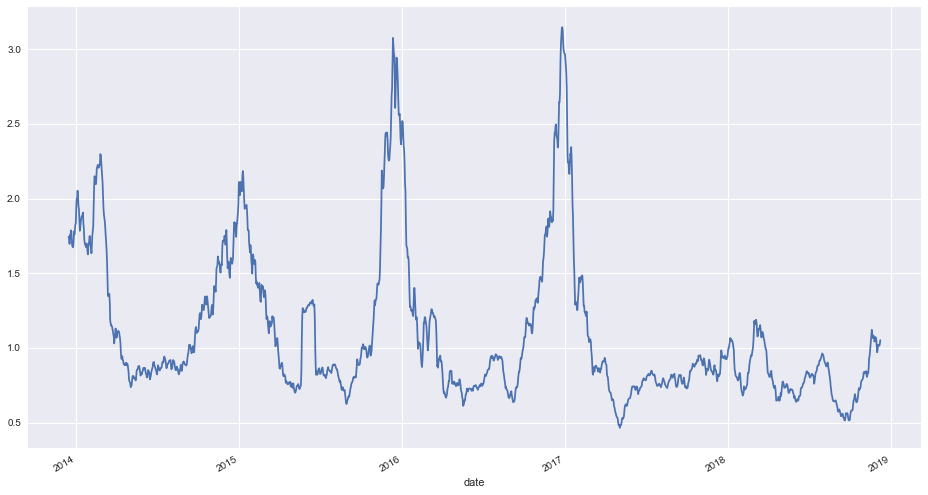

In [5]:
data['co'].rolling(30, center=True).mean().plot(figsize = (16,9))

## 雾霾的来源：
### 1、燃煤
燃煤主要带来了so2，
### 2、机动车
机动车主要排放物包括氮氧化物，
### 3、工业生产
### 4、 农业燃烧
农业生产主要带来co，2017年前，co主要在冬季产生，推测这与秸秆燃烧有很大关系
燃煤主要带来了so2，而机动车尾气排放有较多的氮氧化物
臭氧主要与温度有关，因此夏天的臭氧浓度更高
臭氧还来源于太阳照射NO及活性烃
臭氧的危害：https://www.epa.gov/ground-level-ozone-pollution/health-effects-ozone-pollution

In [22]:
data['pm10'].rolling(5, center=True,
              win_type='gaussian').sum(std=10)

date
2013-12-01            NaN
2013-12-02            NaN
2013-12-03     440.269020
2013-12-04     518.722612
2013-12-05     685.183728
2013-12-06     790.467542
2013-12-07     709.848474
2013-12-08     696.463976
2013-12-09     565.466719
2013-12-10     304.419270
2013-12-11     178.076594
2013-12-12     208.739227
2013-12-13     219.962624
2013-12-14     316.342267
2013-12-15     333.993628
2013-12-16     312.758731
2013-12-17     323.904745
2013-12-18     314.055668
2013-12-19     272.011715
2013-12-20     401.970095
2013-12-21     525.452286
2013-12-22     732.540491
2013-12-23     901.840155
2013-12-24     839.218695
2013-12-25     683.885535
2013-12-26     536.134977
2013-12-27     354.830474
2013-12-28     225.446600
2013-12-29     354.125047
2013-12-30     443.273561
                 ...     
2018-11-22     398.450017
2018-11-23     426.993884
2018-11-24     610.101105
2018-11-25     828.680732
2018-11-26     906.366750
2018-11-27     955.618585
2018-11-28    1016.696922
2018-11

In [9]:
data_pm = pd.read_csv('./db/pm/beijing_extra_20140707.csv',parse_dates = True)
data_pm

,date,hour,type,东四,天坛,官园,万寿西宫,奥体中心,农展馆,万柳,...,密云水库,东高村,永乐店,榆垡,琉璃河,前门,永定门内,西直门北,南三环,东四环
0,20140707,0,SO2,21.1,15.4,2.0,6.1,2.0,10.6,22.7,...,9.3,8.4,7.8,2.0,11.9,3.8,2.5,9.0,NaN,64.8
1,20140707,0,SO2_24h,18.4,12.1,11.6,6.7,2.6,12.5,17.4,...,12.4,22.6,10.0,2.7,15.5,7.2,2.5,4.4,NaN,50.7
2,20140707,0,NO2,52.9,46.3,37.6,31.5,55.0,44.9,44.9,...,5.2,31.6,39.7,6.8,85.2,75.8,66.1,42.8,NaN,127.4
3,20140707,0,NO2_24h,41.6,29.9,27.7,27.9,46.0,39.0,44.0,...,6.4,29.2,29.0,5.6,35.3,66.8,66.6,51.4,NaN,103.0
4,20140707,0,O3,78.6,86.6,91.0,103.1,78.6,90.7,104.9,...,158.0,84.5,54.3,NaN,20.3,55.7,107.4,96.3,NaN,18.9
5,20140707,0,O3_24h,192.9,218.2,205.5,211.7,206.8,224.4,184.0,...,217.6,183.4,253.6,NaN,223.3,168.8,204.8,168.9,NaN,150.1
6,20140707,0,CO,1.9,1.9,2.0,1.5,1.4,1.5,1.6,...,1.3,0.6,1.3,0.7,0.8,2.0,2.2,1.7,NaN,1.5
7,20140707,0,CO_24h,1.6,1.4,1.4,1.1,1.2,1.6,1.0,...,1.6,1.1,1.2,0.7,0.7,1.5,1.5,1.2,NaN,1.6
8,20140707,1,SO2,19.0,12.9,2.0,6.6,2.0,10.1,21.1,...,10.5,7.8,6.6,2.0,11.1,3.1,2.5,2.0,6.6,67.5
9,20140707,1,SO2_24h,18.4,12.2,11.6,6.8,2.5,12.5,17.7,...,12.7,22.6,10.1,2.7,15.5,7.2,2.5,4.1,8.9,51.8


In [49]:
############################
for i in range(23):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


In [15]:
data_pm_co

,date,hour,type,东四,天坛,官园,万寿西宫,奥体中心,农展馆,万柳,...,密云水库,东高村,永乐店,榆垡,琉璃河,前门,永定门内,西直门北,南三环,东四环
6,20140707,0,CO,1.9,1.9,2.0,1.5,1.4,1.5,1.6,...,1.3,0.6,1.3,0.7,0.8,2.0,2.2,1.7,NaN,1.5
14,20140707,1,CO,1.7,1.7,2.4,1.8,1.3,1.4,1.8,...,1.3,0.6,0.9,0.8,0.8,1.8,1.8,2.1,2.0,1.4
22,20140707,2,CO,1.6,1.5,2.0,1.5,1.3,1.4,1.8,...,1.2,0.5,0.6,0.8,0.8,1.4,1.6,1.8,1.8,0.9
30,20140707,3,CO,1.2,1.2,1.7,1.3,1.0,1.0,1.6,...,1.1,0.5,0.4,0.7,0.7,1.3,1.4,1.5,1.5,0.8
38,20140707,4,CO,1.0,1.0,1.5,1.1,0.7,1.0,1.5,...,1.1,0.5,0.4,0.6,0.9,1.2,1.3,1.3,NaN,0.8
46,20140707,5,CO,1.1,0.8,1.3,0.8,0.6,0.9,1.3,...,1.1,0.4,0.4,0.6,1.0,1.0,0.9,1.1,1.0,0.6
54,20140707,6,CO,1.1,0.8,1.2,0.7,0.6,0.8,1.0,...,1.1,0.5,0.3,0.7,1.2,1.0,1.0,0.9,1.0,0.7
62,20140707,7,CO,1.1,0.8,1.1,0.7,0.5,0.8,1.0,...,1.2,0.6,0.3,0.8,1.3,0.9,1.1,1.0,1.3,0.8
70,20140707,8,CO,1.0,0.9,1.2,0.7,0.7,0.9,1.0,...,1.3,0.8,0.4,0.7,1.4,1.0,1.2,1.0,1.5,0.9
78,20140707,9,CO,0.8,1.0,1.2,NaN,0.8,1.0,1.0,...,1.2,0.9,0.5,0.7,1.2,1.1,1.3,1.1,1.5,1.3


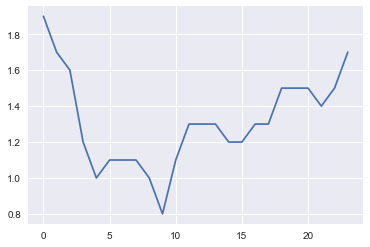

In [19]:
#data_pm_co['东四'].plot(figsize = (16,9),)
plt.plot(data_pm_co['hour'],data_pm_co['东四'])

In [29]:
data_pm.columns.values

array(['date', 'hour', 'type', '东四', '天坛', '官园', '万寿西宫', '奥体中心', '农展馆',
       '万柳', '北部新区', '植物园', '丰台花园', '云岗', '古城', '房山', '大兴', '亦庄', '通州',
       '顺义', '昌平', '门头沟', '平谷', '怀柔', '密云', '延庆', '定陵', '八达岭', '密云水库',
       '东高村', '永乐店', '榆垡', '琉璃河', '前门', '永定门内', '西直门北', '南三环', '东四环'],
      dtype=object)

In [45]:
columns = ['东城区','西城区','朝阳区','海淀区','丰台区','石景山区','房山区','大兴区','通州区','顺义区','昌平区','门头沟区','平谷区','怀柔区','密云区','延庆区']
zone_pm = data_pm[['东四','官园','奥体中心','万柳','丰台花园','古城','房山','大兴','通州','顺义','昌平','门头沟','平谷','怀柔','密云','延庆']]
zone_pm.columns=columns
zone_pm_so2 = zone_pm.loc[zone_pm['type']=='SO2']
zone_pm_o3 = zone_pm.loc[zone_pm['type']=='O3']
zone_pm_no2 = zone_pm.loc[zone_pm['type']=='NO2']
zone_pm_co = zone_pm.loc[zone_pm['type']=='CO']
zone_pm.iloc[0,:].tolist()

[21.1,
 2.0,
 2.0,
 22.7,
 2.0,
 2.0,
 2.0,
 9.5,
 9.0,
 7.2,
 4.2,
 2.0,
 2.2,
 2.0,
 14.2,
 2.0]

In [22]:
from pyecharts import Map, Geo

ERROR:lml.utils:failed to import pyecharts_snapshot
Traceback (most recent call last):
  File "H:\Program\Anaconda3\lib\site-packages\lml\utils.py", line 43, in do_import
    plugin_module = __import__(plugin_module_name)
ModuleNotFoundError: No module named 'pyecharts_snapshot'


In [48]:
value = zone_pm.iloc[0,:].tolist()
attr= columns
map0 = Map("北京0时雾霾", width=1200, height=600)
map0.add("北京地图", attr, value, maptype="北京",visual_range=[1, 25],  is_visualmap=True, visual_text_color='#000')
map0.render(path="./04-00北京地图.html")